### Setup Anaconda environment

conda create --name=IntroToTensorFlow python=3 anaconda <br>
source activate IntroToTensorFlow <br>
conda install -c conda-forge tensorflow

In [1]:
import tensorflow as tf

# Create TensorFlow object called hello_constant
hello_constant = tf.constant('Hello World!')

with tf.Session() as sess: #sess = session instance
    # Run the tf.constant operation in the session
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


## Session’s feed_dict

feeding data into TensorFlow

In [2]:
x = tf.placeholder(tf.string)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Hello World'})

In [8]:
import tensorflow as tf
from grader import get_result

import tensorflow as tf

def run():
    output = None
    x = tf.placeholder(tf.int32)

    with tf.Session() as sess:
        output = sess.run(x, feed_dict={x: 123})

    return output

In [9]:
### DON'T MODIFY ANYTHING BELOW ###
### Be sure to run all cells above before running this cell ###
import grader

try:
    grader.get_result(run)
except Exception as err:
    print(str(err))

You got it right.  You figured out how to use feed_dict! 



## TensorFlow Math

In [10]:
import tensorflow as tf

# TODO: Convert the following to TensorFlow:
x = tf.constant(10)
y = tf.constant(2)
z = tf.subtract(tf.divide(x,y),tf.cast(tf.constant(1), tf.float64))

# TODO: Print z from a session
with tf.Session() as sess:
    output = sess.run(z)
    print(output)


4.0


**Logit** is a function that maps probabilities <br>
**Truncated normal distribution (tf.truncated_normal)** generates values which follow normal distribution with specified mean and a standard deviation except the values whose magnitude is more than two standard deviations from the mean. They are dropped and re-picked. The point for using truncated normal is to overcome saturation of tome functions like sigmoid (where if the value is too big/small, the neuron stops learning). <br>

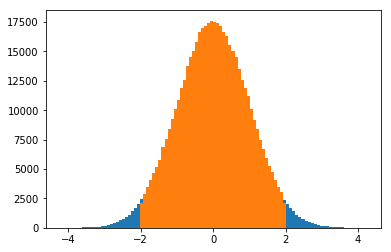

In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline  

n = 500000
A = tf.truncated_normal((n,))
B = tf.random_normal((n,))
with tf.Session() as sess:
    a, b = sess.run([A, B])
 
plt.hist(b, 100, (-4.2, 4.2));
plt.hist(a, 100, (-4.2, 4.2));

## Softmax

$$ S(y_{i}) = \frac{e^{y_{i}}}{\sum_{j}e^{y_{i}}} $$

In [3]:
# Solution is available in the other "solution.py" tab
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    frac_bottom = np.sum(np.exp(x), axis=0)
    return np.divide(np.exp(x), frac_bottom)

logits = [3.0, 1.0, 0.2]
print(softmax(logits))

[0.8360188  0.11314284 0.05083836]


In [5]:
import tensorflow as tf

x = tf.nn.softmax([2.0, 1.0, 0.2])

## Cross Entropy

$$D(S, L) = - \sum_{i} L_{i} log(S_{i})$$

## Multinomial Logistic Classification

$$D(S(Wx + b), L)$$


## Aspects of learning

* How do we fill image pixels to the classifier?
* Where do we initialize the optimization

In [7]:
a = 1000000000
for i in range(1000000):
    a = a + 1e-6
print(a - 1000000000)

0.95367431640625


## S. G. D. 
### Stochastic Gradient Descent

Choose random from the whole set and do more steps.



In [2]:
28*28*10 + 28*10

8120

# TensorFlow Convolution Layer

In [ ]:
# Output depth
k_output = 64

# Image Properties
image_width = 10
image_height = 10
color_channels = 3

# Convolution filter
filter_size_width = 5
filter_size_height = 5

# Input/Image
input = tf.placeholder(
    tf.float32,
    shape=[None, image_height, image_width, color_channels])

# Weight and bias
weight = tf.Variable(tf.truncated_normal(
    [filter_size_height, filter_size_width, color_channels, k_output]))
bias = tf.Variable(tf.zeros(k_output))

# Apply Convolution
conv_layer = tf.nn.conv2d(input, weight, strides=[1, 2, 2, 1], padding='SAME') # [batch, input_height, input_width, input_channels]
# Add bias
conv_layer = tf.nn.bias_add(conv_layer, bias)
# Apply activation function
conv_layer = tf.nn.relu(conv_layer)